In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
paths_list = ['/Users/ssolieva/Desktop/github_repo/Q23_paper/analysis-of-HH/v033-HH-results/version3/',
         '/Users/ssolieva/Desktop/github_repo/Q23_paper/analysis-of-HH/pg9-HH-results/version3/',
         '/Users/ssolieva/Desktop/github_repo/Q23_paper/analysis-of-HH/ch01v2-HH-results/version1/']

search_seq_hits_info_paths = ['/Users/ssolieva/Desktop/github_repo/Q23_paper/OAS_database_searches/V033/search3/data/parsed_logfile/',
                        '/Users/ssolieva/Desktop/github_repo/Q23_paper/OAS_database_searches/CH01/search7/data/parsed_logfile/',
                         '/Users/ssolieva/Desktop/github_repo/Q23_paper/OAS_database_searches/PG9/data/parsed_logfile/']

In [3]:
def get_structure_HH_counts(which_system, paths):
    '''
    which_system options = ch01 pg9 v033
    split the classification list file into hammerheads and nonhammerheads
    '''
    if which_system == 'V033':
        output_dir_path = paths[0]
    if which_system == 'PG9':
        output_dir_path = paths[1]
    if which_system == 'CH01':
        output_dir_path = paths[2]
        
    data_all =[]
    data_hammerheads = []
    data_non_hammerheads = [] 
    for d in range(1,21):
        output = np.load(f'{output_dir_path}output/dir_{d}_classification_list.npy')
        for i in range(len(output)): 
            if 'yesHH' in output[i]:
                data_hammerheads.append(output[i])
            if 'noHH' in output[i]:
                data_non_hammerheads.append(output[i])
            data_all.append(output[i])
    n_HH = len(data_non_hammerheads)
    y_HH = len(data_hammerheads)
    print(f'\t> Number of hammerhead structures / total structures: {y_HH}/{y_HH+n_HH} == {(y_HH/(y_HH+n_HH))*100} %')
    return data_hammerheads, data_non_hammerheads, data_all

In [4]:
def investigate_structure_HH_counts_sequence_specific_info(data_hammerheads, data_all):
    print(f'\nInformation about sequences:')  
    seq_numbers = []
    for data in [data_hammerheads, data_all]:
        seq_numbers_all_models = []
        for i in range(len(data)):
            #print(data_hammerheads[i].split(",")[1])
            seq_index_start = data[i].split(",")[1].find('sequence_')+len('sequence_')
            seq_index_end = data[i].split(",")[1].find('_unrelaxed_rank')
            seq_numbers_all_models.append(data[i].split(",")[1][seq_index_start:seq_index_end])
        seq_numbers.append(np.unique(seq_numbers_all_models))
    print(f'\t> Number of sequences with at least 1 HH-folded model: {len(seq_numbers[0])} from {len(seq_numbers[1])} total sequences')
    

In [5]:
def investigate_structure_HH_counts_donor_specific_info(data_hammerheads):
    print(f'\nInformation about donors:')  
    
    # --- introducing filter: # of sequences ----------------------------------------------------

    print('> Filter by # of sequences from donors in the OAS')
    hammerhead_donors = []
    for i in range(len(data_hammerheads)):
        if data_hammerheads[i].split(",")[3] != 'no' and data_hammerheads[i].split(",")[3] != 'no_donor_name_found':
            hammerhead_donors.append(data_hammerheads[i].split(",")[3])
    unique_hammerhead_donors = np.unique(hammerhead_donors)
    donors_at_different_seq_cutoffs_and_HH = []
    donors_at_different_seq_cutoffs_and_HH.append(unique_hammerhead_donors)
    print(f'\t> Number of donors with 1 or more HH structures & any # of sequences in the OAS: {len(unique_hammerhead_donors)} from 215 total donors')
    # filter: minimum # of sequences in the OAS from donor (1M, 5M, 10M):
    # OAS databse info:
    donor_names_with_over1M_seqs = np.load('/Users/ssolieva/Desktop/Kulp_lab/projects/OAS_database_searches/donor_counts/n_seqs_1M_donor_names.npy')
    donors_at_different_seq_cutoffs_OAS = []
    for cutoff_seqn in [1000000, 5000000, 10000000]:
        count_donors_in_OAS = []
        for donors in range(len(donor_names_with_over1M_seqs)):
            donor = donor_names_with_over1M_seqs[donors]
            counter = []  # get the number of sequences from each donor in the full OAS database 
            with open(f"/Users/ssolieva/Desktop/Kulp_lab/projects/OAS_database_searches/donor_counts/{donor}.out", "r") as fd: # import the results file
                file_contents = fd.read().splitlines() # read in the results
                for i in range(len(file_contents)):
                    counter.append(int(file_contents[i]))
                if sum(counter) >= cutoff_seqn and donor != 'no':
                    #print(f'{donor}, Number of sequences in OAS database: {sum(counter)}')
                    count_donors_in_OAS.append(donor)
            fd.close()
        donors_at_different_seq_cutoffs_OAS.append(count_donors_in_OAS)
        #print(f'\t> Number of donors in OAS with over {cutoff_seqn} sequences: {len(count_donors_in_OAS)}')
        #print(f'These are the donors with {cutoff_seqn}+ sequences in the OAS database: {count_donors_in_OAS}')
        # from HH structure hits: 
        count_donors_HH_structure = [] # donors with at least 1 HH structure. 
        for i in range(len(unique_hammerhead_donors)):
            if unique_hammerhead_donors[i] in count_donors_in_OAS:
                count_donors_HH_structure.append(unique_hammerhead_donors[i])
        donors_at_different_seq_cutoffs_and_HH.append(count_donors_HH_structure)
        #print(f'These are the donors with {cutoff_seqn}+ sequences that have at least 1 HH structure: {count_donors_HH_structure}')
        print(f'\t> Number of donors with 1 or more HH structures & {cutoff_seqn}+ sequences in the OAS: {len(count_donors_HH_structure)} from {len(count_donors_in_OAS)} total donors')
    #print(donors_at_different_seq_cutoffs_and_HH[0], donors_at_different_seq_cutoffs_and_HH[1], donors_at_different_seq_cutoffs_and_HH[2], donors_at_different_seq_cutoffs_and_HH[3])
    
    pie_chart_info = []
    pie_chart_info.append([len(donors_at_different_seq_cutoffs_and_HH[0]),215])
    for i in range(3):
        pie_chart_info.append([len(donors_at_different_seq_cutoffs_and_HH[i+1]),len(donors_at_different_seq_cutoffs_OAS[i])])
    
    # --- introducing filter: length of CDRH3 ----------------------------------------------------
    # filter: lengths of any, 20 or more, and 23 or more. 
    print('> Filter by CDRH3 length')
    donors_at_different_cdrh3_cutoffs_and_HH = []
    for cdrh3_length in [0,20,23]:
        hammerhead_donors = []
        for i in range(len(data_hammerheads)):
            if data_hammerheads[i].split(",")[3] != 'no' and data_hammerheads[i].split(",")[3] != 'no_donor_name_found':
                if len(data_hammerheads[i].split(",")[2]) >= cdrh3_length:
                    hammerhead_donors.append(data_hammerheads[i].split(",")[3])
        unique_hammerhead_donors_cdrh3_len = np.unique(hammerhead_donors)
        print(f'\t> Number of donors that have CDRH3 length >= {cdrh3_length}: {len(unique_hammerhead_donors_cdrh3_len)} donors')
    return pie_chart_info, donors_at_different_seq_cutoffs_and_HH[0], donors_at_different_seq_cutoffs_OAS

In [6]:
def plot_pie_chart_donors_based(which_system, load_path, file_name, pie_chart_info):
    ''' 
    example:
        which_system = 'CH01'
        file_name = 'CH01_donors_list'
        load_path = search_seq_hits_info_paths[2]
    '''
    donors_seq_based = np.unique(np.load(f'{load_path}{file_name}.npy'))
    n_donors_seq_based = len(donors_seq_based)
    print(n_donors_seq_based)
    n_donors_structure_based = pie_chart_info[0][0]
    
    structure = n_donors_structure_based
    sequence  = n_donors_seq_based - structure
    neither = 215 - n_donors_seq_based
    
    fig, ax = plt.subplots(figsize=[4,4])
    ax.pie([neither, sequence, structure], 
           wedgeprops = {"edgecolor" : "black", 'linewidth': 5}, 
           autopct='%1.1f%%', colors=['#96a0b3','#48bcbc','#5fb342'])  #['#5596ce','#f29843','#e9c64e']
    plt.legend([f'{neither} non-axe donors', f'{sequence} sequence-only axe donors', f'{structure} structure axe donors'], 
               bbox_to_anchor = (1.2, 0.1), fontsize=14)
    plt.title(f'{which_system} Donor Counts', weight='bold', y=0.95, fontsize=16)
    plt.tight_layout()
    plt.savefig(f'plots/{which_system}_pie_chart.pdf', dpi=300, transparent=True, bbox_inches="tight")
    plt.show()
    return donors_seq_based


In [7]:
def plot_pie_chart_donors_based(which_system, load_path, file_name, pie_chart_info):
    ''' 
    example:
        which_system = 'CH01'
        file_name = 'CH01_donors_list'
        load_path = search_seq_hits_info_paths[2]
    '''
    donors_seq_based = np.unique(np.load(f'{load_path}{file_name}.npy'))
    n_donors_seq_based = len(donors_seq_based)
    print(n_donors_seq_based)
    n_donors_structure_based = pie_chart_info[0][0]
    
    structure = n_donors_structure_based
    sequence  = n_donors_seq_based - structure
    neither = 215 - n_donors_seq_based
    
    fig, ax = plt.subplots(figsize=[4,4])
    ax.pie([neither, sequence, structure], 
           wedgeprops = {"edgecolor" : "black", 'linewidth': 1}, 
           autopct='%1.1f%%', colors=['#96a0b3','#48bcbc','#b778b3'])  #['#5596ce','#f29843','#e9c64e']
    plt.legend([f'{neither} non-axe donors', f'{sequence} sequence-only axe donors', f'{structure} structure axe donors'], 
               bbox_to_anchor = (1.2, 0.1), fontsize=12)
    #plt.title(f'{which_system} Donor Counts', weight='bold', y=0.95, fontsize=16)
    plt.title(f'all donors', weight='bold', y=0.95, fontsize=16)
    plt.tight_layout()
    plt.savefig(f'plots/{which_system}_pie_chart.pdf', dpi=300, transparent=True, bbox_inches="tight")
    plt.show()
    return donors_seq_based


In [35]:
def investigate_seq_counts_donor_specific_info(data_hammerheads,load_path,file_name):
    print(f'\nInformation about donors:')  
    
    # --- introducing filter: # of sequences ----------------------------------------------------

    print('> Filter by # of sequences from donors in the OAS')
    donors_seq_based = np.unique(np.load(f'{load_path}{file_name}.npy'))    
    donors_seq_based_clean = []
    for i in range(len(donors_seq_based)):
        if donors_seq_based[i] != 'no' and donors_seq_based[i] != 'no_donor_name_found':
            donors_seq_based_clean.append(donors_seq_based[i])
    
    print(f'\t> Number of donors with 1 or more seq search hit & any # of sequences in the OAS: {len(donors_seq_based_clean)} from 215 total donors')
    # filter: minimum # of sequences in the OAS from donor (1M, 5M, 10M):
    # OAS databse info:
    donor_names_with_over1M_seqs = np.load('/Users/ssolieva/Desktop/Kulp_lab/projects/OAS_database_searches/donor_counts/n_seqs_1M_donor_names.npy')
    donors_at_different_seq_cutoffs_OAS = []
    for cutoff_seqn in [1000000, 5000000, 10000000]:
        count_donors_in_OAS = []
        for donors in range(len(donor_names_with_over1M_seqs)):
            donor = donor_names_with_over1M_seqs[donors]
            counter = []  # get the number of sequences from each donor in the full OAS database 
            with open(f"/Users/ssolieva/Desktop/Kulp_lab/projects/OAS_database_searches/donor_counts/{donor}.out", "r") as fd: # import the results file
                file_contents = fd.read().splitlines() # read in the results
                for i in range(len(file_contents)):
                    counter.append(int(file_contents[i]))
                if sum(counter) >= cutoff_seqn and donor != 'no':
                    #print(f'{donor}, Number of sequences in OAS database: {sum(counter)}')
                    count_donors_in_OAS.append(donor)
            fd.close()
        donors_at_different_seq_cutoffs_OAS.append(count_donors_in_OAS)
        #print(f'\t> Number of donors in OAS with over {cutoff_seqn} sequences: {len(count_donors_in_OAS)}')
        #print(f'\tThese are the donors with {cutoff_seqn}+ sequences in the OAS database: {count_donors_in_OAS}\n')
        
        # from HH structure hits: 
        count_donors_seq = [] # donors with at least 1 HH structure. 
        donors_at_different_seq_cutoffs = []
        for i in range(len(donors_seq_based_clean)):
            if donors_seq_based_clean[i] in count_donors_in_OAS:
                count_donors_seq.append(donors_seq_based_clean[i])
        donors_at_different_seq_cutoffs.append(count_donors_seq)
        #print(f'These are the donors with {cutoff_seqn}+ sequences that have at least 1 HH structure: {count_donors_HH_structure}')
        print(f'\t> Number of donors with 1 or more seq search hit & {cutoff_seqn}+ sequences in the OAS: {len(count_donors_seq)} from {len(count_donors_in_OAS)} total donors')
    # --- introducing filter: length of CDRH3 ----------------------------------------------------
    # filter: lengths of any, 20 or more, and 23 or more. 
    #print('> Filter by CDRH3 length')
    #donors_at_different_cdrh3_cutoffs_and_HH = []
    #for cdrh3_length in [0,20,23]:
    #    hammerhead_donors = []
    #    for i in range(len(data_hammerheads)):
    #        if data_hammerheads[i].split(",")[3] != 'no' and data_hammerheads[i].split(",")[3] != 'no_donor_name_found':
    #            if len(data_hammerheads[i].split(",")[2]) >= cdrh3_length:
    #                hammerhead_donors.append(data_hammerheads[i].split(",")[3])
    #    unique_hammerhead_donors_cdrh3_len = np.unique(hammerhead_donors)
    #    print(f'\t> Number of donors that have CDRH3 length >= {cdrh3_length}: {len(unique_hammerhead_donors_cdrh3_len)} donors')
    #return pie_chart_info, donors_at_different_seq_cutoffs_and_HH[0], donors_at_different_seq_cutoffs_OAS

In [36]:
investigate_seq_counts_donor_specific_info(data_hammerheads,load_path,'donors_list')#which_system, load_path, 'donors_list', pie_chart_info


Information about donors:
> Filter by # of sequences from donors in the OAS
	> Number of donors with 1 or more seq search hit & any # of sequences in the OAS: 146 from 215 total donors
	> Number of donors with 1 or more seq search hit & 1000000+ sequences in the OAS: 33 from 37 total donors
	> Number of donors with 1 or more seq search hit & 5000000+ sequences in the OAS: 16 from 17 total donors
	> Number of donors with 1 or more seq search hit & 10000000+ sequences in the OAS: 14 from 15 total donors


CH01 /Users/ssolieva/Desktop/github_repo/Q23_paper/OAS_database_searches/CH01/search7/data/parsed_logfile/
-----------------------------------------
>>>>> sequence hit analysis only <<<<<
-----------------------------------------


Information about donors:
> Filter by # of sequences from donors in the OAS
	> Number of donors with 1 or more seq search hit & any # of sequences in the OAS: 146 from 215 total donors
	> Number of donors with 1 or more seq search hit & 1000000+ sequences in the OAS: 33 from 37 total donors
	> Number of donors with 1 or more seq search hit & 5000000+ sequences in the OAS: 16 from 17 total donors
	> Number of donors with 1 or more seq search hit & 10000000+ sequences in the OAS: 14 from 15 total donors
-----------------------------------------
>>>>> structure hit analysis<<<<<
-----------------------------------------

	> Number of hammerhead structures / total structures: 8230/243565 == 3.3789748116519207 %

Information about donors:
> Filter by # of sequenc

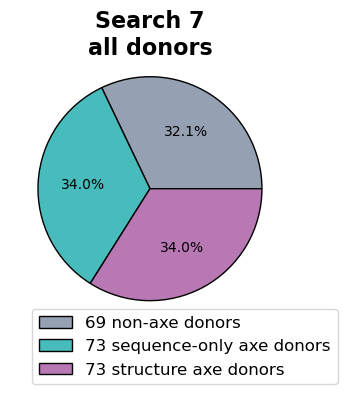

In [43]:
which_system = 'CH01'
load_path = search_seq_hits_info_paths[1]

print(which_system, load_path)
print('-----------------------------------------\n>>>>> sequence hit analysis only <<<<<\n-----------------------------------------\n')
investigate_seq_counts_donor_specific_info(data_hammerheads,load_path,'donors_list')#which_system, load_path, 'donors_list', pie_chart_info

print('-----------------------------------------\n>>>>> structure hit analysis<<<<<\n-----------------------------------------\n')
data_hammerheads, data_non_hammerheads, data_all = get_structure_HH_counts(which_system, paths_list)
pie_chart_info, donors_structure_based, donors_OAS = investigate_structure_HH_counts_donor_specific_info(data_hammerheads)
investigate_structure_HH_counts_sequence_specific_info(data_hammerheads, data_all)
donors_seq_based = plot_pie_chart_donors_based(which_system, load_path, 'donors_list', pie_chart_info)

donors_seq_based_CH01 = donors_seq_based
donors_structure_based_CH01 = donors_structure_based

V033 /Users/ssolieva/Desktop/github_repo/Q23_paper/OAS_database_searches/V033/search3/data/parsed_logfile/
	> Number of hammerhead structures / total structures: 123/123480 == 0.09961127308066084 %

Information about donors:
> Filter by # of sequences from donors in the OAS
	> Number of donors with 1 or more HH structures & any # of sequences in the OAS: 14 from 215 total donors
	> Number of donors with 1 or more HH structures & 1000000+ sequences in the OAS: 11 from 37 total donors
	> Number of donors with 1 or more HH structures & 5000000+ sequences in the OAS: 10 from 17 total donors
	> Number of donors with 1 or more HH structures & 10000000+ sequences in the OAS: 10 from 15 total donors
> Filter by CDRH3 length
	> Number of donors that have CDRH3 length >= 0: 14 donors
	> Number of donors that have CDRH3 length >= 20: 14 donors
	> Number of donors that have CDRH3 length >= 23: 11 donors

Information about sequences:
	> Number of sequences with at least 1 HH-folded model: 75 from 2

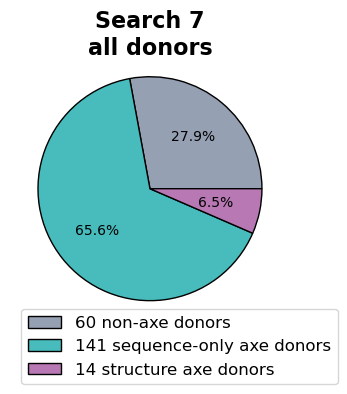

In [40]:
which_system = 'V033'
load_path = search_seq_hits_info_paths[0]
print(which_system, load_path)
data_hammerheads, data_non_hammerheads, data_all = get_structure_HH_counts(which_system, paths_list)
pie_chart_info, donors_structure_based, donors_OAS = investigate_structure_HH_counts_donor_specific_info(data_hammerheads)
investigate_structure_HH_counts_sequence_specific_info(data_hammerheads, data_all)
donors_seq_based = plot_pie_chart_donors_based(which_system, load_path, 'donors_list', pie_chart_info)

donors_seq_based_V033 = donors_seq_based
donors_structure_based_V033 = donors_structure_based

PG9 /Users/ssolieva/Desktop/github_repo/Q23_paper/OAS_database_searches/PG9/data/parsed_logfile/
	> Number of hammerhead structures / total structures: 8166/181240 == 4.505627896711543 %

Information about donors:
> Filter by # of sequences from donors in the OAS
	> Number of donors with 1 or more HH structures & any # of sequences in the OAS: 63 from 215 total donors
	> Number of donors with 1 or more HH structures & 1000000+ sequences in the OAS: 26 from 37 total donors
	> Number of donors with 1 or more HH structures & 5000000+ sequences in the OAS: 16 from 17 total donors
	> Number of donors with 1 or more HH structures & 10000000+ sequences in the OAS: 14 from 15 total donors
> Filter by CDRH3 length
	> Number of donors that have CDRH3 length >= 0: 63 donors
	> Number of donors that have CDRH3 length >= 20: 63 donors
	> Number of donors that have CDRH3 length >= 23: 63 donors

Information about sequences:
	> Number of sequences with at least 1 HH-folded model: 4094 from 36248 tota

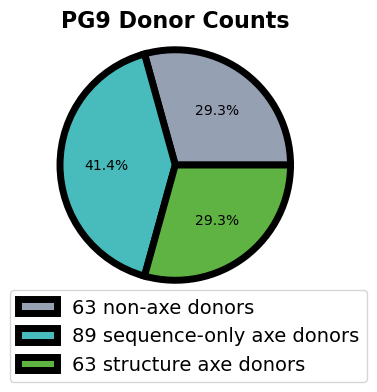

In [95]:
which_system = 'PG9'
load_path = search_seq_hits_info_paths[3]
print(which_system, load_path)

data_hammerheads, data_non_hammerheads, data_all = get_structure_HH_counts(which_system, paths_list)
pie_chart_info,donors_structure_based, donors_OAS = investigate_structure_HH_counts_donor_specific_info(data_hammerheads)
investigate_structure_HH_counts_sequence_specific_info(data_hammerheads, data_all)
donors_seq_based = plot_pie_chart_donors_based(which_system, load_path, 'donors_list', pie_chart_info)

donors_seq_based_PG9 = donors_seq_based
donors_structure_based_PG9 = donors_structure_based

In [96]:
donors_sequence_based_combined = np.unique(np.concatenate([donors_seq_based_PG9,donors_seq_based_CH01, donors_seq_based_V033]))
donors_structure_based_combined= np.unique(np.concatenate([donors_structure_based_PG9,donors_structure_based_CH01, donors_structure_based_V033]))

181


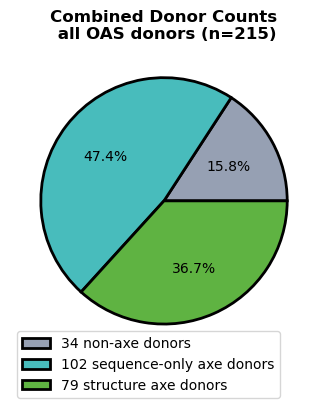

In [97]:
# ALL DONORS

n_donors_seq_based = len(donors_sequence_based_combined)
print(n_donors_seq_based)
n_donors_structure_based = len(donors_structure_based_combined)
structure = n_donors_structure_based
sequence  = n_donors_seq_based - structure
neither = 215 - n_donors_seq_based
fig, ax = plt.subplots(figsize=[4,4])
plt.title(f'Combined Donor Counts\n all OAS donors (n=215)', weight='bold')
ax.pie([neither, sequence, structure], 
       wedgeprops = {"edgecolor" : "black", 'linewidth': 2}, 
       autopct='%1.1f%%', colors=['#96a0b3','#48bcbc','#5fb342']) 
plt.legend([f'{neither} non-axe donors', f'{sequence} sequence-only axe donors', f'{structure} structure axe donors'], 
           bbox_to_anchor = (0.9, 0.1))
plt.savefig(f'plots/combined_pie_chart.pdf', dpi=200)
plt.show()

36


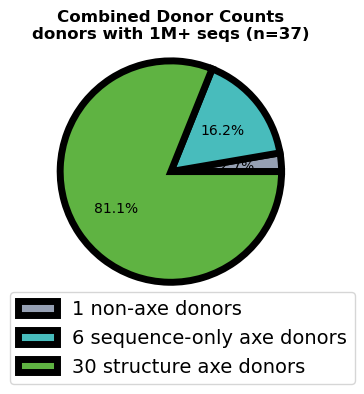

In [111]:
# for donors with 1M+ seqs:

donors_sequence_based_combined_over1M = []
for i in range(len(donors_sequence_based_combined)):
    if donors_sequence_based_combined[i] in donors_OAS[0]:
        donors_sequence_based_combined_over1M.append(donors_sequence_based_combined[i])
        
donors_structure_based_combined_over1M = []
for i in range(len(donors_structure_based_combined)):
    if donors_structure_based_combined[i] in donors_OAS[0]:
        donors_structure_based_combined_over1M.append(donors_structure_based_combined[i])

n_donors_seq_based = len(donors_sequence_based_combined_over1M)
print(n_donors_seq_based)
n_donors_structure_based = len(donors_structure_based_combined_over1M)

structure = n_donors_structure_based
sequence  = n_donors_seq_based - structure
neither = len(donors_OAS[0]) - n_donors_seq_based

fig, ax = plt.subplots(figsize=[4,4])
ax.pie([neither, sequence, structure], 
       wedgeprops = {"edgecolor" : "black", 'linewidth': 5}, 
       autopct='%1.1f%%', colors=['#96a0b3','#48bcbc','#5fb342']) 
plt.legend([f'{neither} non-axe donors', f'{sequence} sequence-only axe donors', f'{structure} structure axe donors'], 
           bbox_to_anchor = (1.2, 0.1), fontsize=14)
plt.title(f'Combined Donor Counts\ndonors with 1M+ seqs (n={len(donors_OAS[0])})', weight='bold', y=0.95, fontsize=12)
plt.tight_layout()
plt.savefig(f'plots/combined_pie_chart_1M.pdf',  dpi=300, transparent=True, bbox_inches="tight")
plt.show()

16


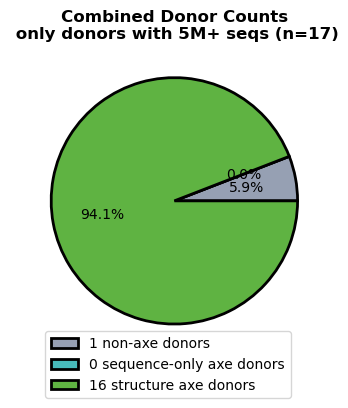

In [99]:
# for donors with 5M+ seqs:

donors_sequence_based_combined_over5M = []
for i in range(len(donors_sequence_based_combined)):
    if donors_sequence_based_combined[i] in donors_OAS[1]:
        donors_sequence_based_combined_over5M.append(donors_sequence_based_combined[i])
        
donors_structure_based_combined_over5M = []
for i in range(len(donors_structure_based_combined)):
    if donors_structure_based_combined[i] in donors_OAS[1]:
        donors_structure_based_combined_over5M.append(donors_structure_based_combined[i])

n_donors_seq_based = len(donors_sequence_based_combined_over5M)
print(n_donors_seq_based)
n_donors_structure_based = len(donors_structure_based_combined_over5M)

structure = n_donors_structure_based
sequence  = n_donors_seq_based - structure
neither = len(donors_OAS[1]) - n_donors_seq_based

fig, ax = plt.subplots(figsize=[4,4])
plt.title(f'Combined Donor Counts\n only donors with 5M+ seqs (n={len(donors_OAS[1])})', weight='bold')
ax.pie([neither, sequence, structure], 
       wedgeprops = {"edgecolor" : "black", 'linewidth': 2}, 
       autopct='%1.1f%%', colors=['#96a0b3','#48bcbc','#5fb342']) 
plt.legend([f'{neither} non-axe donors', f'{sequence} sequence-only axe donors', f'{structure} structure axe donors'], 
           bbox_to_anchor = (0.9, 0.1))
plt.savefig(f'plots/combined_pie_chart_5M.pdf', dpi=200)
plt.show()

36


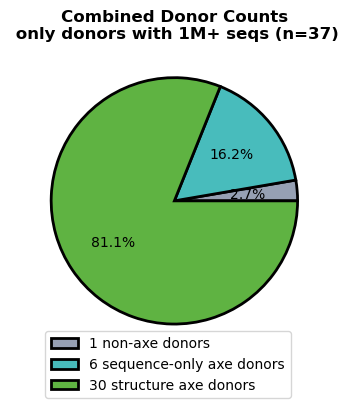

In [100]:
n_donors_seq_based = len(donors_sequence_based_combined_over1M)
print(n_donors_seq_based)
n_donors_structure_based = len(donors_structure_based_combined_over1M)

structure = n_donors_structure_based
sequence  = n_donors_seq_based - structure
neither = len(donors_OAS[0]) - n_donors_seq_based

fig, ax = plt.subplots(figsize=[4,4])
plt.title(f'Combined Donor Counts\n only donors with 1M+ seqs (n={len(donors_OAS[0])})', weight='bold')
ax.pie([neither, sequence, structure], 
       wedgeprops = {"edgecolor" : "black", 'linewidth': 2}, 
       autopct='%1.1f%%', colors=['#96a0b3','#48bcbc','#5fb342']) 
plt.legend([f'{neither} non-axe donors', f'{sequence} sequence-only axe donors', f'{structure} structure axe donors'], 
           bbox_to_anchor = (0.9, 0.1))
plt.savefig(f'plots/combined_pie_chart_1M.pdf', dpi=200)
plt.show()